## Single Variable - Batch GD

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df = pd.read_csv('RegData.csv', names=['x', 'y'])
df

,x,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       13 non-null     float64
 1   y       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes
None


In [58]:
df.describe()

,x,y
count,13.000000,13.000000
mean,5.953846,5.569231
std,1.714942,1.314271
min,2.900000,4.000000
25%,4.900000,4.400000
50%,6.000000,5.200000
75%,6.700000,6.100000
max,9.800000,7.900000


In [59]:
x = df['x']
x.shape

(13,)

In [60]:
y = df['y']
y.shape

(13,)

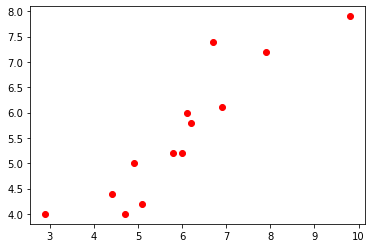

In [61]:
plt.scatter(x, y, c=['red'])
plt.show()

In [42]:
theta_0 = theta_1 = 0.0
learning_rate = 0.001
m = len(x)
theta_0_values = []
theta_1_values = []
cost = []
iterations = 0
threshold = 0.001

In [43]:
for i in range(1000):    
    ypred = theta_0 + theta_1 * x
    error = ypred - y
    cost_value = np.sum(error ** 2) / (2 * m)
    cost.append(cost_value)
    theta_0_grad = (np.sum(error)) / m
    theta_1_grad = (error.T @ x) / m
    theta_0 = theta_0 - learning_rate * theta_0_grad
    theta_1 = theta_1 - learning_rate * theta_1_grad
    theta_0_values.append(theta_0)
    theta_1_values.append(theta_1)
    iterations += 1
    if i != 0:
        if np.abs(cost[i] - cost[i-1]) < threshold:
            break

In [62]:
print("Thetas: [", theta_0_values[-1], " , ", theta_1_values[-1], "]")
print("Takes: ", iterations, " iterations")

Thetas: [ 0.14435052414373012  ,  0.8707343153725478 ]
Takes:  90  iterations


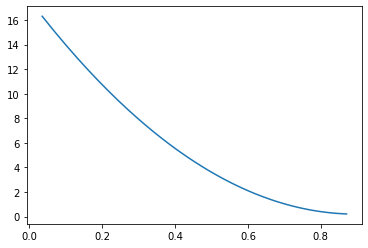

In [63]:
#np.abs(theta_0_values[i] - theta_0_values[i - 1]) < threshold and np.abs(theta_1_values[i] - theta_1_values[i-1]) < threshold:
plt.plot(theta_1_values, cost)
plt.show()

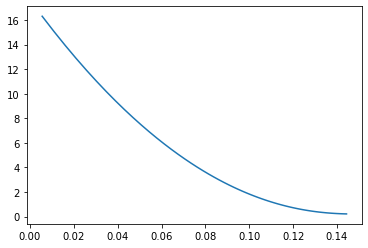

In [64]:
plt.plot(theta_0_values, cost)
plt.show()

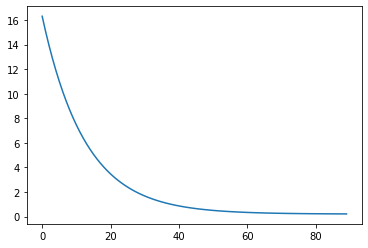

In [65]:
plt.plot(np.arange(iterations), cost)
plt.show()

In [70]:
from sklearn.metrics import r2_score
y_pred = theta_0_values[-1] + theta_1_values[-1] * x
accuracy = r2_score(y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 73.21257634804044 %


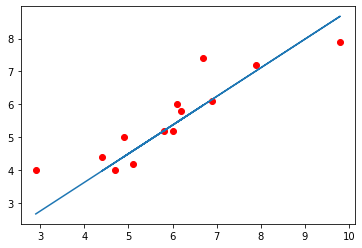

In [71]:
plt.scatter(x, y, c=['red'])
plt.plot(x, y_pred)
plt.show()

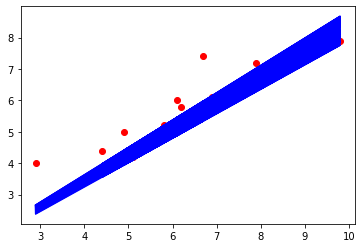

In [72]:
plt.scatter(x, y, c=['red'])
for i in range(len(theta_0_values)-40, len(theta_0_values)):
    y_pred_plt = theta_0_values[i] + theta_1_values[i] * x
    plt.plot(x, y_pred_plt, 'b')
plt.show()

# Multi- Variable

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = np.genfromtxt('MultipleLR.csv', delimiter=',')
df

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [75]:
X = df[:, 0:3]
X = np.concatenate((X, np.ones(25).reshape(25,1)), axis=1)
Y = df[:,3]

In [76]:
X

array([[ 73.,  80.,  75.,   1.],
       [ 93.,  88.,  93.,   1.],
       [ 89.,  91.,  90.,   1.],
       [ 96.,  98., 100.,   1.],
       [ 73.,  66.,  70.,   1.],
       [ 53.,  46.,  55.,   1.],
       [ 69.,  74.,  77.,   1.],
       [ 47.,  56.,  60.,   1.],
       [ 87.,  79.,  90.,   1.],
       [ 79.,  70.,  88.,   1.],
       [ 69.,  70.,  73.,   1.],
       [ 70.,  65.,  74.,   1.],
       [ 93.,  95.,  91.,   1.],
       [ 79.,  80.,  73.,   1.],
       [ 70.,  73.,  78.,   1.],
       [ 93.,  89.,  96.,   1.],
       [ 78.,  75.,  68.,   1.],
       [ 81.,  90.,  93.,   1.],
       [ 88.,  92.,  86.,   1.],
       [ 78.,  83.,  77.,   1.],
       [ 82.,  86.,  90.,   1.],
       [ 86.,  82.,  89.,   1.],
       [ 78.,  83.,  85.,   1.],
       [ 76.,  83.,  71.,   1.],
       [ 96.,  93.,  95.,   1.]])

In [77]:
Y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [107]:
def multiple_batch_GD(X,Y, iterations=1000, alpha=0.0001, threshold=0.01):
    theta = np.zeros(4)
    thetas = []
    iters = 0
    cost = []
    m = len(X)
    for i in range(iterations):
        ypred = X.dot(theta)
        errors = np.subtract(ypred, Y)
        
        cost_value = np.sum(errors ** 2) / (2 * m)
        cost.append(cost_value)
        
        grad = (alpha / m) * X.transpose().dot(errors)        
        theta = theta - grad
        thetas.append(theta)
        iters +=1
        if np.all(np.abs(cost[i] - cost[i-1]) < threshold) and i != 0:
            break
    return theta, thetas, iters, cost

In [108]:
theta, thetas, iters, cost = multiple_batch_GD(X,Y)
print("Final Thetas: ", theta)
print("Iterations: ", iters)
#print("Cost:", cost)

Final Thetas:  [0.6096541  0.61116145 0.79792974 0.00784564]
Iterations:  154


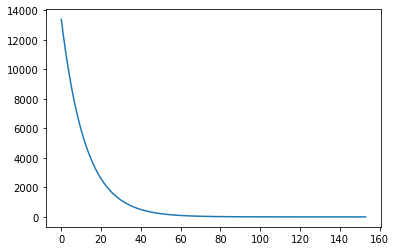

In [109]:
plt.plot(np.arange(iters), cost)
plt.show()

In [110]:
from sklearn.metrics import r2_score

y_pred = X.dot(theta)
accuracy = r2_score(Y, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 98.32064543309298 %


### Functions and Random Data Test

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
X_data = np.linspace(0, 20, 100)
a = -2
b = 1
Y_data = [a*xi + b for xi in X_data]

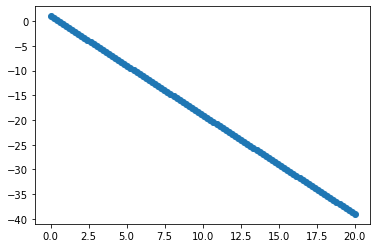

In [113]:
plt.scatter(X_data,Y_data)
plt.show()

In [114]:
def batch_GD(X,Y, alpha=0.001, iterat=1000, threshold=0.001):
    
    theta_0 = theta_1 = 0.0
    m = len(X)
    theta_0_values = []
    theta_1_values = []
    cost = []
    iterations = 0
    
    for i in range(iterat):    
        ypred = theta_0 + theta_1 * X
        error = ypred - Y
        cost_value = np.sum(error ** 2) / (2 * m)
        cost.append(cost_value)
        theta_0_grad = (np.sum(error)) / m
        theta_1_grad = (error.T @ X) / m
        theta_0 = theta_0 - alpha * theta_0_grad
        theta_1 = theta_1 - alpha * theta_1_grad
        theta_0_values.append(theta_0)
        theta_1_values.append(theta_1)
        iterations += 1
        if i != 0:
            if np.abs(theta_0_values[i] - theta_0_values[i - 1]) < threshold and np.abs(theta_1_values[i] - theta_1_values[i-1]) < threshold:
                break
    return theta_0_values, theta_1_values, theta_0_values[-1], theta_1_values[-1], cost, iterations

In [115]:
theta_0_values, theta_1_values, theta_0_opt, theta_1_opt, cost, iterations = batch_GD(X_data,Y_data)

In [116]:
from sklearn.metrics import r2_score

y_pred = theta_0_opt + theta_1_opt * X_data
accuracy = r2_score(Y_data, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 99.75766662461606 %


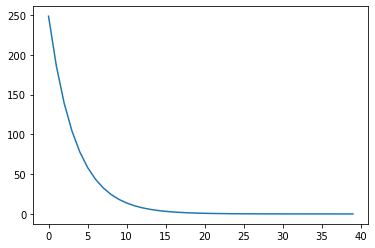

In [117]:
plt.plot(np.arange(iterations),cost)
plt.show()

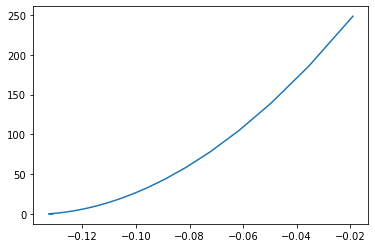

In [118]:
plt.plot(theta_0_values, cost)
plt.show()

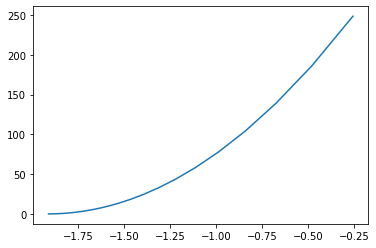

In [119]:
plt.plot(theta_1_values, cost)
plt.show()

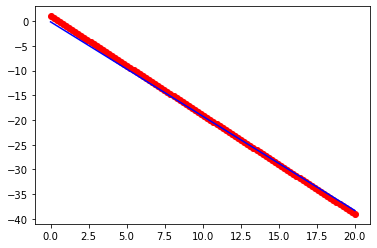

In [120]:
y_pred = theta_0_opt + theta_1_opt * X_data
plt.plot(X_data,Y_data, 'or', linestyle='none')
plt.plot(X_data, y_pred, 'b')
plt.show()

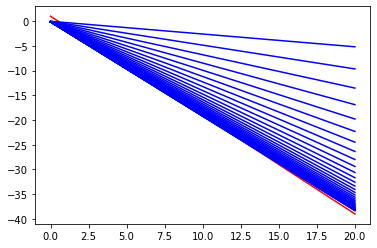

In [121]:
plt.plot(X_data, Y_data, 'r')
for i in range(len(theta_0_values)):
    plt.plot(X_data, theta_0_values[i] + theta_1_values[i] * X_data, 'b')